<a href="https://colab.research.google.com/github/Son141/AI_CNN_NguyenHoangSon_19146251/blob/main/Face_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install mtcnn


     |████████████████████████████████| 2.3 MB 34.0 MB/s 


In [ ]:
pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import cv2
from imageio import imread,imsave
import matplotlib.image as mpimg
detetor = MTCNN()

In [ ]:
# Tạo 50 ảnh face của mình cho tập train
for i in range(50):
  filename ='/content/drive/MyDrive/Son/input/IMG_Son/Son (%d).jpg' % (i)
  name=mpimg.imread(filename)
  faces=detetor.detect_faces(name)
  plt.imshow(name)
  ax =plt.gca()
  for face in faces:
    x,y,x1,y1=face['box']
    rect=plt.Rectangle((x,y),x1,y1,fill=False,color='red')
    ax.add_patch(rect)
    crop = name[y:(y+y1), x:(x+x1)]
    crop=cv2.resize(crop, dsize=(256,256))
    print(plt.show())
    print(plt.imshow(crop))
    imsave('/content/drive/MyDrive/Son/Train/Son/Son%d.jpg'%(i), crop)

In [ ]:
# Tạo 50 ảnh Face ngẫu nhiên của người khác cho tập train 
for i in range(50):
  filename ='/content/drive/MyDrive/Son/input/IMG_Other/AA (%d).jpg' % (i)
  name=mpimg.imread(filename)
  faces=detetor.detect_faces(name)
  plt.imshow(name)
  ax =plt.gca()
  for face in faces:
    x,y,x1,y1=face['box']
    rect=plt.Rectangle((x,y),x1,y1,fill=False,color='red')
    ax.add_patch(rect)
    crop = name[y:(y+y1), x:(x+x1)]
    crop=cv2.resize(crop, dsize=(256,256))
    print(plt.show())
    print(plt.imshow(crop))
    imsave('/content/drive/MyDrive/Son/Train/Other/A%d.jpg'%(i), crop)

In [ ]:
# tạo 10 ảnh mình cho tập test 
for i in range(10):
  filename ='/content/drive/MyDrive/Son/input/IMG_Son1/Son1 (%d).jpg' % (i)
  name = mpimg.imread(filename)
  faces=detetor.detect_faces(name)
  plt.imshow(name)
  ax =plt.gca()
  for face in faces:
    x,y,x1,y1=face['box']
    rect=plt.Rectangle((x,y),x1,y1,fill=False,color='red')
    ax.add_patch(rect)
    crop = name[y:(y+y1), x:(x+x1)]
    crop=cv2.resize(crop, dsize=(256,256))
    print(plt.show())
    print(plt.imshow(crop))
    imsave('/content/drive/MyDrive/Son/Test/Son/AA%d.jpg'%(i), crop)

In [ ]:
# tạo 10 ảnh người khác cho tập test 
for i in range(20):
  filename ='/content/drive/MyDrive/Son/input/IMG_Other1/T (%d).jpg' % (i)
  name = mpimg.imread(filename)
  faces=detetor.detect_faces(name)
  plt.imshow(name)
  ax =plt.gca()
  for face in faces:
    x,y,x1,y1=face['box']
    rect=plt.Rectangle((x,y),x1,y1,fill=False,color='red')
    ax.add_patch(rect)
    crop = name[y:(y+y1), x:(x+x1)]
    crop=cv2.resize(crop, dsize=(256,256))
    print(plt.show())
    print(plt.imshow(crop))
    imsave('/content/drive/MyDrive/Son/Test/Other/AB%d.jpg'%(i), crop)

In [ ]:
# tạo 10 ảnh người khác cho tập test 
for i in range(13):
  filename ='/content/drive/MyDrive/Son/input/IMG/B (%d).jpg' % (i)
  name=mpimg.imread(filename)
  faces=detetor.detect_faces(name)
  plt.imshow(name)
  ax =plt.gca()
  for face in faces:
    x,y,x1,y1=face['box']
    rect=plt.Rectangle((x,y),x1,y1,fill=False,color='red')
    ax.add_patch(rect)
    crop = name[y:(y+y1), x:(x+x1)]
    crop=cv2.resize(crop, dsize=(256,256))
    print(plt.show())
    print(plt.imshow(crop))
    imsave('/content/drive/MyDrive/Son/Test1/SH%d.jpg'%(i), crop)

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    
test_datagen = ImageDataGenerator()
train_dataset= image_generator.flow_from_directory('/content/drive/MyDrive/Son/Train',
                                      target_size = (256,256),
                                       batch_size = 12,  
                                       class_mode = 'categorical') #phan loai

test_dataset=test_datagen.flow_from_directory('/content/drive/MyDrive/Son/Test',
                                      target_size = (256,256),
                                       batch_size = 12,  
                                       class_mode = 'categorical') #phan loai  

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
train_dataset.classes
print(train_dataset.class_indices)
test_dataset.classes
test_dataset.class_indices

{'Other': 0, 'Son': 1}


{'Other': 0, 'Son': 1}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3))) # 32 lần tích chập

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3))) # 64 lần tích chập

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3))) # 128 lần tích chập

model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 128)     

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(train_dataset,epochs=20,batch_size=64,validation_data=test_dataset,verbose=1)

Epoch 1/20
9/9 [==============================] - 2s 162ms/step - loss: 2.8644 - accuracy: 0.5600 - val_loss: 27.2729 - val_accuracy: 0.7333
Epoch 2/20
9/9 [==============================] - 1s 61ms/step - loss: 0.4599 - accuracy: 0.8100 - val_loss: 36.4005 - val_accuracy: 0.6667
Epoch 3/20
9/9 [==============================] - 1s 58ms/step - loss: 0.3217 - accuracy: 0.9500 - val_loss: 23.4347 - val_accuracy: 0.8667
Epoch 4/20
9/9 [==============================] - 1s 62ms/step - loss: 0.1531 - accuracy: 0.9700 - val_loss: 60.3260 - val_accuracy: 0.8333
Epoch 5/20
9/9 [==============================] - 1s 59ms/step - loss: 0.1157 - accuracy: 0.9500 - val_loss: 44.4136 - val_accuracy: 0.9000
Epoch 6/20
9/9 [==============================] - 1s 62ms/step - loss: 0.0768 - accuracy: 0.9800 - val_loss: 45.0355 - val_accuracy: 0.8667
Epoch 7/20
9/9 [==============================] - 1s 61ms/step - loss: 0.0728 - accuracy: 0.9700 - val_loss: 53.2139 - val_accuracy: 0.9000
Epoch 8/20
9/9 [===

Nguoi la


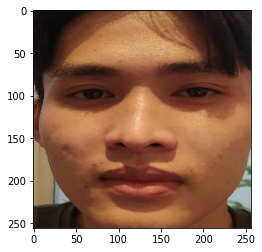

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Son/Test1/SH11.jpg"

img=load_img(filename,target_size=(256,256))
plt.imshow(img)
plt.show
img = img_to_array(img)
img  = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("Nguoi la")
if(test==1):
    print("Son")


Nguoi la


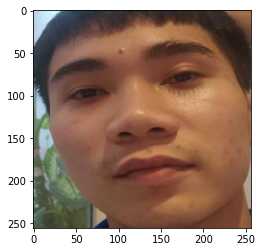

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Son/Test1/SH0.jpg"

img=load_img(filename,target_size=(256,256))
plt.imshow(img)
plt.show
img = img_to_array(img)
img  = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("Nguoi la")
if(test==1):
    print("Son")


Son


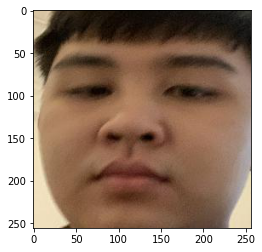

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Son/Test1/SH1.jpg"

img=load_img(filename,target_size=(256,256))
plt.imshow(img)
plt.show
img = img_to_array(img)
img  = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("Nguoi la")
if(test==1):
    print("Son")


Son


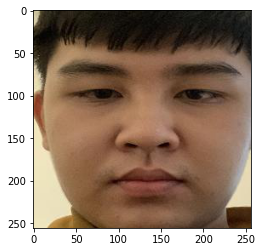

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Son/Test1/SH3.jpg"

img=load_img(filename,target_size=(256,256))
plt.imshow(img)
plt.show
img = img_to_array(img)
img  = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("Nguoi la")
if(test==1):
    print("Son")
